# Introduction to Neural Networks with PyTorch

# 1. Imports and configuration

## 1.1 Imports

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

print(torch.__version__)

1.9.0+cu111


## 1.2 Device

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cuda


In [39]:
torch.manual_seed(101)

# 2. Data

## 2.1 Transformations

In [40]:
transform = transforms.Compose([transforms.ToTensor()])

## 2.2 Download

In [41]:
trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

In [42]:
print(trainset)
print(testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [43]:
print(len(trainset))
print(type(trainset))

60000
<class 'torchvision.datasets.mnist.MNIST'>


## 2.3 Generate train, dev and test sets

In [44]:
TRAINSET_SIZE = 55000
DEVSET_SIZE = 5000

trainset, devset = random_split(dataset = trainset,
                                lengths = [TRAINSET_SIZE, DEVSET_SIZE],
                                generator = torch.Generator().manual_seed(42))

In [45]:
print(len(trainset))
print(len(devset))
print(len(testset))

55000
5000
10000


## 2.3 Revisar los datos

In [46]:
trainset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.1098, 0.2627, 0.9490, 

In [47]:
img, label = trainset[0]
print(type(img))
print(img.shape)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


In [48]:
print(type(label))
print(label)

<class 'int'>
6


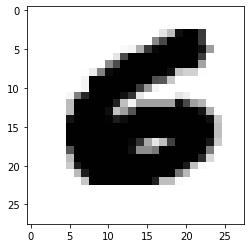

In [49]:
plt.imshow(img.view(28,28), cmap="gist_yarg")

## 2.4 Data loaders

In [50]:
BATCH_SIZE = 32

train_loader = DataLoader(dataset = trainset,
                          batch_size = BATCH_SIZE,
                          shuffle = True)

dev_loader = DataLoader(dataset = devset,
                        batch_size = BATCH_SIZE,
                        shuffle = True)

test_loader = DataLoader(dataset = testset,
                         batch_size = BATCH_SIZE,
                         shuffle = False)

In [51]:
len(train_loader)

1719

In [52]:
# dataloaders are iterators
for images, labels in train_loader:
    print('imgs shape:', images.shape) # print first batch shape: ([batch_size, 28, 28])
    print('labels shape:', labels.shape)
    break

imgs shape: torch.Size([32, 1, 28, 28])
labels shape: torch.Size([32])


# 3. Model

## 3.1 Neural Network

Fully-connected feedforward Network

In [53]:
class FCNN(nn.Module):
    def __init__(self, input_size, output_size, hidden1_size, hidden2_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)
    
    def forward(self, x):
        #x: [batch_size, num_features]
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x

In [54]:
INPUT_SIZE = 28*28
HIDDEN1_SIZE = 300
HIDDEN2_SIZE = 100
OUTPUT_SIZE = 10

model = FCNN(input_size = INPUT_SIZE,
             output_size = OUTPUT_SIZE,
             hidden1_size = HIDDEN1_SIZE,
             hidden2_size = HIDDEN2_SIZE).to(device)

print(model)

FCNN(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


## 3.2 Parámetros

In [55]:
model.fc1.weight

Parameter containing:
tensor([[-0.0150, -0.0344,  0.0293,  ...,  0.0261,  0.0046,  0.0098],
        [-0.0305,  0.0132,  0.0257,  ..., -0.0348, -0.0216,  0.0302],
        [ 0.0356, -0.0299,  0.0139,  ...,  0.0218, -0.0042,  0.0137],
        ...,
        [ 0.0344,  0.0292, -0.0137,  ..., -0.0158, -0.0106,  0.0350],
        [-0.0130, -0.0262, -0.0160,  ...,  0.0076, -0.0012,  0.0316],
        [ 0.0352,  0.0280,  0.0039,  ...,  0.0121, -0.0170, -0.0214]],
       device='cuda:0', requires_grad=True)

In [56]:
model.fc1.weight.shape

torch.Size([300, 784])

In [57]:
model.fc1.bias

Parameter containing:
tensor([-3.2681e-02,  1.7756e-02,  2.3786e-02,  2.0420e-02, -2.3902e-02,
        -2.2928e-02,  2.5041e-03, -1.0990e-02,  2.4946e-02, -1.4421e-02,
        -2.3087e-02, -2.7628e-02,  7.7165e-03,  1.3551e-02, -1.3709e-02,
        -8.1033e-03, -2.6604e-02, -2.2753e-02,  5.9002e-03, -2.2889e-02,
         2.9456e-02, -2.9643e-02, -3.0975e-02,  4.2702e-03,  1.3252e-02,
        -2.3315e-02, -2.8355e-02,  3.8944e-03, -3.1808e-02,  6.8646e-03,
        -2.0498e-02,  5.6088e-03, -2.6520e-02,  5.4993e-03,  3.0063e-02,
         8.1861e-03,  2.2487e-02,  3.4915e-02, -1.2011e-02, -2.3839e-02,
         5.7128e-03,  1.1392e-02,  2.5832e-02, -2.7234e-03, -8.7833e-03,
        -2.4097e-03, -1.7024e-02, -3.4964e-02, -2.7194e-02,  2.6326e-02,
        -3.9560e-04,  3.3553e-02, -1.4231e-02,  8.7385e-03,  5.6345e-03,
        -2.6945e-03,  3.5943e-04, -7.5244e-03,  2.6769e-02,  1.8850e-02,
        -1.0712e-02,  3.4363e-02, -1.9999e-02, -3.1552e-02, -3.4692e-02,
         2.1986e-02, -9.0945e

In [58]:
model.fc1.bias.shape

torch.Size([300])

In [59]:
#Número de parámetros
for name, param in model.named_parameters():
    print(f'{name}: \t {param.numel()}')

fc1.weight: 	 235200
fc1.bias: 	 300
fc2.weight: 	 30000
fc2.bias: 	 100
fc3.weight: 	 1000
fc3.bias: 	 10


In [60]:
params = sum(p.numel() for p in model.parameters())
params_grad = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'parámetros entrenables: {params_grad}')
print(f'total de parámetros: {params}')

parámetros entrenables: 266610
total de parámetros: 266610


# 4. Loss

In [61]:
#CrossEntropyLoss combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss(reduction='mean')

# 5. Optimizador

In [62]:
LEARNING_RATE = 0.001
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 6. Entrenamiento

In [63]:
NUM_EPOCHS = 15

history = {"train": {"loss": [], "acc": []}, "dev": {"loss": [], "acc": []}}

for epoch in range(NUM_EPOCHS):
    
    start_time = time.time()

    #Training loop
    model.train()
    loss_sum = 0
    acc_sum = 0

    for i, batch in enumerate(train_loader):
        img, label = batch
        #>>img: #######
        #>>label: #######

        #Reshape
        img = img.view(img.shape[0], -1)
        #>>img: #######
        
        #Enviar al dispositivo
        img = img.to(device)
        label = label.to(device)

        #Forward
        logits = model(x = img)
        #>>logits: #######
        
        #Loss
        loss = criterion(logits, label)

        # Acc
        predicted_class = torch.argmax(logits, axis=-1)
        acc = torch.eq(predicted_class, label).float().mean()#.item()

        #Backprop
        optimizer.zero_grad()
        loss.backward()

        #Update params
        optimizer.step()

        loss_sum += loss.item()
        acc_sum += acc.item()
    
    epoch_train_loss = loss_sum / len(train_loader)
    epoch_train_acc = acc_sum / len(train_loader)


    #Evaluation loop
    model.eval()
    with torch.no_grad():
        loss_sum = 0
        acc_sum = 0

        for i, batch in enumerate(dev_loader):
            img, label = batch
            #>>img: [batch_size, 1, 28, 28]
            #>>label: [batch_size]

            #Reshape
            img = img.view(img.shape[0], -1)
            #>>img: [batch_size, 28x28]
            
            #Enviar al dispositivo
            img = img.to(device)
            label = label.to(device)

            #Forward
            logits = model(x = img)
            #>>logits: [batch_size, num_classes]
            
            #Loss
            loss = criterion(logits, label)

            # Acc
            predicted_class = torch.argmax(logits, axis=-1)
            acc = torch.eq(predicted_class, label).float().mean()#.item()

            loss_sum += loss.item()
            acc_sum += acc.item()
        
        epoch_dev_loss = loss_sum / len(dev_loader)
        epoch_dev_acc = acc_sum / len(dev_loader)
    

    history["train"]["loss"].append(epoch_train_loss)
    history["train"]["acc"].append(epoch_train_acc)
    history["dev"]["loss"].append(epoch_dev_loss)
    history["dev"]["acc"].append(epoch_dev_acc)

    elapsed_time = time.time() - start_time

    print('-' * 80)
    print(f'Epoch: {epoch+1:03}/{NUM_EPOCHS} | Time: {elapsed_time:.4f}s | Train loss: {epoch_train_loss:.4f} | Train acc: {epoch_train_acc:.4f} | Dev loss: {epoch_dev_loss:.4f} | Dev acc: {epoch_dev_acc:.4f}')


--------------------------------------------------------------------------------
Epoch: 001/15 | Time: 14.0270s | Train loss: 0.8988 | Train acc: 0.7383 | Dev loss: 0.8001 | Dev acc: 0.7733
--------------------------------------------------------------------------------
Epoch: 002/15 | Time: 13.7770s | Train loss: 0.7745 | Train acc: 0.7785 | Dev loss: 0.7566 | Dev acc: 0.7840
--------------------------------------------------------------------------------
Epoch: 003/15 | Time: 13.6670s | Train loss: 0.7449 | Train acc: 0.7858 | Dev loss: 0.7514 | Dev acc: 0.7844
--------------------------------------------------------------------------------
Epoch: 004/15 | Time: 13.2090s | Train loss: 0.7301 | Train acc: 0.7894 | Dev loss: 0.7581 | Dev acc: 0.7852
--------------------------------------------------------------------------------
Epoch: 005/15 | Time: 13.8010s | Train loss: 0.7213 | Train acc: 0.7917 | Dev loss: 0.7495 | Dev acc: 0.7874
--------------------------------------------------

# 7. Curvas de aprendizaje

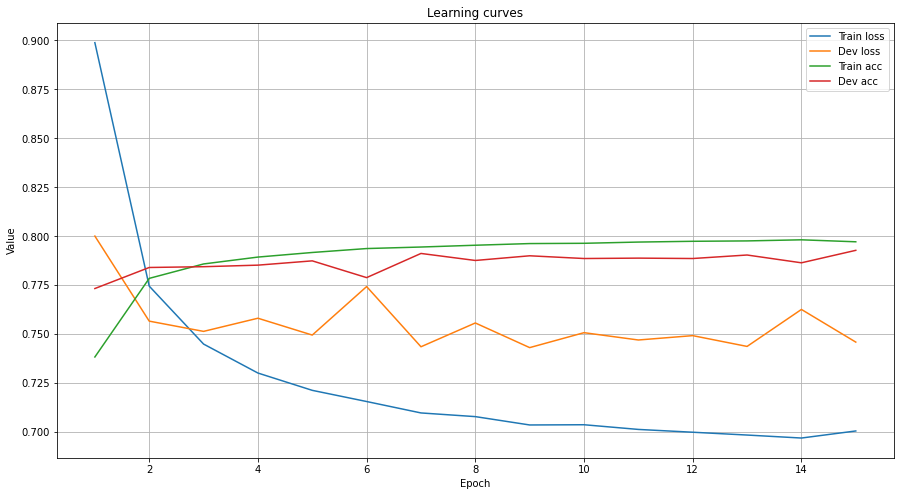


min_dev_loss: 0.7431127763098213 , epoch: 9


In [64]:
plt.figure(figsize=(15,8))
x = np.linspace(1, len(history["train"]["loss"]),num=len(history["train"]["loss"]))
plt.plot(x, history["train"]["loss"], label='Train loss')
plt.plot(x, history["dev"]["loss"], label='Dev loss')
plt.plot(x, history["train"]["acc"], label='Train acc')
plt.plot(x, history["dev"]["acc"], label='Dev acc')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.title('Learning curves')
plt.grid(b=True)
plt.legend()
plt.show()

#Best dev loss
min_dev_loss = min(history["dev"]["loss"])
epoch = np.argmin(history["dev"]["loss"])+1
print(f'\nmin_dev_loss: {min_dev_loss} , epoch: {epoch}')

# 8. Test

In [65]:
#Testing loop
start_time = time.time()
model.eval()
with torch.no_grad():
    loss_sum = 0
    acc_sum = 0

    for i, batch in enumerate(test_loader):
        img, label = batch
        #>>img: [batch_size, 1, 28, 28]
        #>>label: [batch_size]

        #Reshape
        img = img.view(img.shape[0], -1)
        #>>img: [batch_size, 28x28]
        
        #Enviar al dispositivo
        img = img.to(device)
        label = label.to(device)

        #Forward
        logits = model(x = img)
        #>>logits: [batch_size, num_classes]
        
        #Loss
        loss = criterion(logits, label)

        # Acc
        predicted_class = torch.argmax(logits, axis=-1)
        acc = torch.eq(predicted_class, label).float().mean()#.item()

        loss_sum += loss.item()
        acc_sum += acc.item()
    
    epoch_test_loss = loss_sum / len(test_loader)
    epoch_test_acc = acc_sum / len(test_loader)

elapsed_time = time.time() - start_time

print(f'Time: {elapsed_time:.4f}s | Test loss: {epoch_test_loss:.4f} | Test acc: {epoch_test_acc:.4f}')



Time: 1.2850s | Test loss: 0.7566 | Test acc: 0.7909


# 9. Predicción

In [66]:
img, label = testset[0]

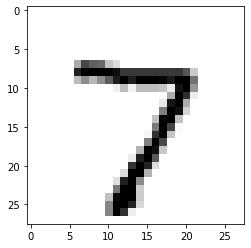

In [67]:
plt.imshow(img.view(28,28), cmap="gist_yarg")

In [68]:
#Salida del modelo entrenado
with torch.no_grad():
    model.eval()
    logits = model(img.view(1,-1).to(device))
    #>>(batch_size=1, 784)
print(logits)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 20.2110,
          0.0000,  0.0000]], device='cuda:0')


In [69]:
#Predicción
pred = logits.argmax().item()
print(pred)

7


In [70]:
#Etiqueta correcta
print(label)

7
